In [2]:
12 + 3

15

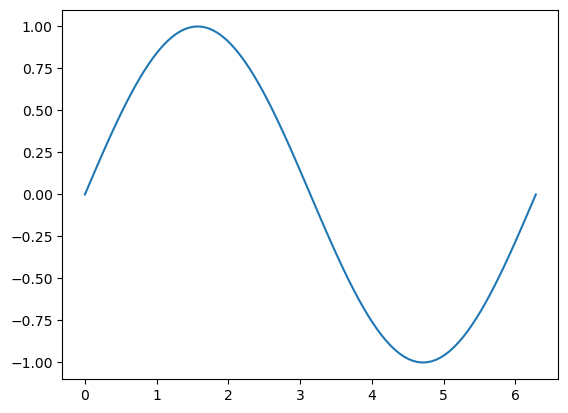

In [1]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 2 * np.pi, 100)

fig, ax = plt.subplots()

# animated=True tells matplotlib to only draw the artist when we
# explicitly request it
(ln,) = ax.plot(x, np.sin(x), animated=True)

# make sure the window is raised, but the script keeps going
plt.show(block=False)

# stop to admire our empty window axes and ensure it is rendered at
# least once.
#
# We need to fully draw the figure at its final size on the screen
# before we continue on so that :
#  a) we have the correctly sized and drawn background to grab
#  b) we have a cached renderer so that ``ax.draw_artist`` works
# so we spin the event loop to let the backend process any pending operations
plt.pause(0.1)

# get copy of entire figure (everything inside fig.bbox) sans animated artist
bg = fig.canvas.copy_from_bbox(fig.bbox)
# draw the animated artist, this uses a cached renderer
ax.draw_artist(ln)
# show the result to the screen, this pushes the updated RGBA buffer from the
# renderer to the GUI framework so you can see it
fig.canvas.blit(fig.bbox)

for j in range(100):
    # reset the background back in the canvas state, screen unchanged
    fig.canvas.restore_region(bg)
    # update the artist, neither the canvas state nor the screen have changed
    ln.set_ydata(np.sin(x + (j / 100) * np.pi))
    # re-render the artist, updating the canvas state, but not the screen
    ax.draw_artist(ln)
    # copy the image to the GUI state, but screen might not be changed yet
    fig.canvas.blit(fig.bbox)
    # flush any pending GUI events, re-painting the screen if needed
    fig.canvas.flush_events()
    # you can put a pause in if you want to slow things down
    # plt.pause(.1)

In [ ]:
X, Y = np.meshgrid(np.linspace(-3, 3, 128), np.linspace(-3, 3, 128))
Z = (1 - X/2 + X**5 + Y**3) * np.exp(-X**2 - Y**2)

Text(0.5, 1.0, 'pcolormesh()')

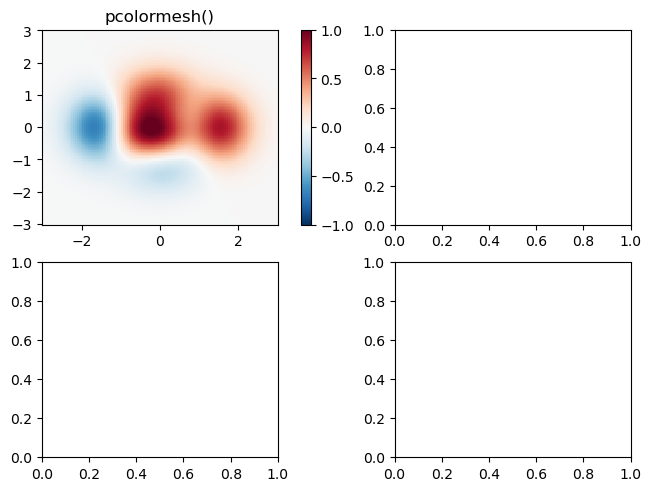

In [ ]:
fig, axs = plt.subplots(2, 2, layout='constrained')
pc = axs[0, 0].pcolormesh(X, Y, Z, vmin=-1, vmax=1, cmap='RdBu_r')
fig.colorbar(pc, ax=axs[0, 0])
axs[0, 0].set_title('pcolormesh()')

In [ ]:
X[0][0]

-3.0